# Car Price Prediction (k-Nearest Neighbors)
In this project, I will explore the fundamentals of machine learning using the K-nearest neighbors algorithm.
The step of this project includes:
- Data Cleaning
- Model2 Building
- Model3 Building
- Model4 Building
- Model5 Building
- Final Performance Plot

In [148]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99
pd.options.display.max_rows = 99

## Data Cleaning

In the CSV file, we can see that the column name is not align with the dataset, we will start with fixing our column names

In [149]:
#read data
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Since the K-Nearest Neighbors only works well with continuous data, we will select only continuous values

In [150]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()

In the dataset, missing value is recordded as "?" ,we will change it to ```np.nan```

In [151]:
#replace"?" as missing value
numeric_cars.replace("?",np.nan,inplace=True)
numeric_cars=numeric_cars.astype(float)

In [152]:
#explore missing values
numeric_cars.isnull().sum()
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


Since ```'normalized-losses'``` contains many missing value, there will be not points to impute it with mean, mode or median. We will simply drop this column.

In [153]:
#Drop independent variables that contain many missing values
numeric_cars.drop(columns='normalized-losses',index=1)
#Drop rows that with a missing target value
numeric_cars=numeric_cars.dropna(subset=['price'])

In [154]:
#impute missing values of other columns with mean
numeric_cars=numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


We will normalize our independent variables to a scale of 0 to 1, this can help us building the model better

In [155]:
#Save target valuable
price_col=numeric_cars['price']
#normalize independent variables
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
#re-asign the dependent variable
numeric_cars['price']=price_col
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


## K-Nearest Neighbors Model Building
In this step we will start building our machine learning models, we will start from easy version of the model, with only one attribute, gradually progress to a slightly complicated model to analyse their performance.
### Model1
In the first model, we will write a function that:
1. Shuffle the DataFrame by index
1. Split the dataset to 75% training and 25% testing
2. Initiate a KNeighhborsRegressor object with K = 5
3. Fit the model and return Root Mean Square Error (RMSE)
4. Loop over all numeric variables one by one
5. Append the result to a dictionary

In [156]:
#Import necessary class
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#defind a function that require three imputs, training columns, target columns, dataframe
def knn_train_test(traincol,targetcol,dataframe):
    knn=KNeighborsRegressor()
#shuffle the DataFrame by index 
    np.random.seed(1)
    shuffelindex=np.random.permutation(dataframe.index)
    dataframe=dataframe.reindex(shuffelindex)
#spliting the DataFrame
    train=dataframe.iloc[:151]
    test=dataframe.iloc[151:]
    knn.fit(train[[traincol]],train[targetcol])
    prediction=knn.predict(test[[traincol]])
    mse=mean_squared_error(test[targetcol],prediction)
    rmse=mse**(1/2)
    return rmse

#Loop over the columns one by one
traincol=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
kvalue={}
for i in traincol:
    results= knn_train_test(i,'price',numeric_cars)
    kvalue[i]=results

kvalue

{'normalized-losses': 6391.912634697067,
 'wheel-base': 4238.25624378706,
 'length': 5500.731909846179,
 'width': 3979.9751617315405,
 'height': 6869.570862695864,
 'curb-weight': 4047.052502155118,
 'engine-size': 3123.320055069605,
 'bore': 6807.187615513473,
 'stroke': 6973.912792744113,
 'compression-rate': 6301.624922763969,
 'horsepower': 4778.254807521257,
 'peak-rpm': 6521.863037752326,
 'city-mpg': 3720.409335758634,
 'highway-mpg': 3379.2250123364083}

We can see that there are a couple of columns that return a relatively low RMSE like ```'engine-size'``` and ```'highway-mpg'```. But this is just a simple model, next we will add another variables, the "k" value.

### Model2
In the second model, we will write a function that:

1. Shuffle the DataFrame by index
2. Split the dataset to 75% training and 25% testing
3. Loop over a list of K value 1,3,5,7,9 and implement it in the constructor
4. Fit the model and return Root Mean Square Error (RMSE)
5. Loop over all numeric variables one by one
6. Append the result to a dictionary with different K value
7. Plot a line chart base on different variable performance

In [157]:
def knn_train_test(traincol,targetcol,dataframe):
    np.random.seed(1)
    shuffelindex=np.random.permutation(dataframe.index)
    dataframe=dataframe.reindex(shuffelindex)
    train=dataframe.iloc[:151]
    test=dataframe.iloc[151:]
#loop over a list of K value
    k_values=[1,3,5,7,9]
    k_rmses={}
    for k in k_values:
#Asign K value in the initiating process
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[traincol]],train[targetcol])
        prediction=knn.predict(test[[traincol]])
        mse=mean_squared_error(test[targetcol],prediction)
        rmse=mse**(1/2)
        k_rmses[k]=rmse
    return k_rmses
#Loop over the columns
traincol=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
k_rmse_results={}
for i in traincol:
    results= knn_train_test(i,'price',numeric_cars)
    k_rmse_results[i]=results

k_rmse_results


{'normalized-losses': {1: 9604.929081466453,
  3: 7494.820436511842,
  5: 6391.912634697067,
  7: 6699.853883298577,
  9: 6861.6389834002875},
 'wheel-base': {1: 2797.4144312203725,
  3: 3392.8627620671928,
  5: 4238.25624378706,
  7: 4456.687059524217,
  9: 4426.032222634904},
 'length': {1: 4952.798701744297,
  3: 5403.624431188139,
  5: 5500.731909846179,
  7: 5103.4515274528885,
  9: 4471.077661709427},
 'width': {1: 2849.2691940215127,
  3: 4076.59327053035,
  5: 3979.9751617315405,
  7: 3845.3326184519606,
  9: 3687.926625900343},
 'height': {1: 6330.178232877807,
  3: 7049.500497198366,
  5: 6869.570862695864,
  7: 6738.641089739572,
  9: 6344.062937760911},
 'curb-weight': {1: 3950.9888180049306,
  3: 4201.343428000144,
  5: 4047.052502155118,
  7: 3842.0974736649846,
  9: 3943.9478256384205},
 'engine-size': {1: 2853.7338453331627,
  3: 2793.6254775629623,
  5: 3123.320055069605,
  7: 2941.73029681235,
  9: 2931.996240628853},
 'bore': {1: 8423.759328233446,
  3: 6501.92893361

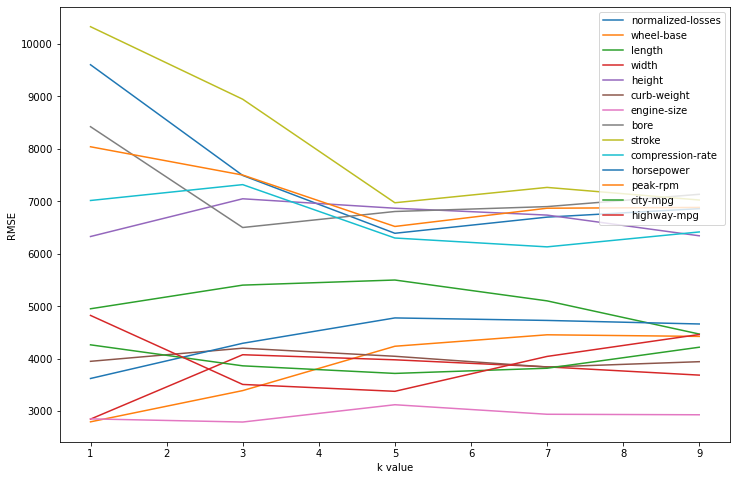

In [158]:
#set figure size
plt.figure(figsize=(12,8))
#Loop over the dictionary to retrieve K value as x and RMSE as y value
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(k_rmse_results.keys())

The graph is certainly unintuitive, next we will base on the previous model, add more fitures in it.

We can roughly see that the 6 best performing attributes includes:```'engine-size'```,```'city-mpg'```,```'highway-mpg'```,``` 'curb-weight'```,```'width'```,```'wheel-base'```,```'horsepower'```.

### Model3
In the third model, we will write a function that:

1. Shuffle the DataFrame by index
2. Split the dataset to 75% training and 25% testing
3. Loop over a list of K value 1,3,5,7,9 and implement it in the constructor
4. Fit the model and return Root Mean Square Error (RMSE)
5. Loop over the 6 features we have decided, and input from 2 variables to 7 variables
6. Append the result to a dictionary with different K value

In [159]:
# The 7 best features
bestfeature=['engine-size','city-mpg','highway-mpg','curb-weight','width','wheel-base','horsepower']

def knn_train_test(traincol,targetcol,dataframe):
    np.random.seed(1)
    shuffelindex=np.random.permutation(dataframe.index)
    dataframe=dataframe.reindex(shuffelindex)
    train=dataframe.iloc[:151]
    test=dataframe.iloc[151:]
    k_values=[1,3,5,7,9]
    k_rmses={}
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[traincol],train[targetcol])
        prediction=knn.predict(test[traincol])
        mse=mean_squared_error(test[targetcol],prediction)
        rmse=mse**(1/2)
        k_rmses[k]=rmse
    return k_rmses

k_rmse_results = {}
#Loop through 2-8 and use the number as a index slice in the bestfeature list
for i in range(2,8):
    results=knn_train_test(bestfeature[:i],'price',numeric_cars)
    k_rmse_results['{} best features'.format(i)]=results
    
k_rmse_results

{'2 best features': {1: 2385.1794523683116,
  3: 2757.875937907448,
  5: 2803.13061615045,
  7: 2832.1350820285993,
  9: 2851.892719096314},
 '3 best features': {1: 2963.0102261045267,
  3: 2978.1890216856427,
  5: 3051.9090036237976,
  7: 3013.4023637268037,
  9: 3257.6830365562987},
 '4 best features': {1: 2513.8171492771703,
  3: 2714.095628381579,
  5: 2652.083958550332,
  7: 2644.9512393946907,
  9: 2938.6944356589443},
 '5 best features': {1: 2115.530080145399,
  3: 2553.932082103986,
  5: 2587.9716667691705,
  7: 2600.155799727613,
  9: 2752.0703445736053},
 '6 best features': {1: 2133.979095492737,
  3: 2519.3118482809723,
  5: 2535.871781143518,
  7: 2566.8968757260673,
  9: 2731.981927167596},
 '7 best features': {1: 2019.7616344509568,
  3: 2445.1150656859572,
  5: 2443.4884842781644,
  7: 2467.066763654063,
  9: 2576.11710918718}}

Perhaps, we can try to fit the model with a K value from 1-25 and pick the best one for our analysis. In the next model we will try to implememt this step

### Model4
In the fourth model, we will write a function that:

1. Shuffle the DataFrame by index
2. Split the dataset to 75% training and 25% testing
3. Loop over a list of K value from 1-25 implement it in the constructor
4. Fit the model and return Root Mean Square Error (RMSE)
5. Loop over the 6 features we have decided, and input from 2 variables to 7 variables
6. Append the result to a dictionary with different K value
7. Plot a line chart base on different variable performance

In [160]:

bestfeature=['engine-size','city-mpg','highway-mpg','curb-weight','width','wheel-base','horsepower']

def knn_train_test(traincol,targetcol,dataframe):
    np.random.seed(1)
    shuffelindex=np.random.permutation(dataframe.index)
    dataframe=dataframe.reindex(shuffelindex)
    train=dataframe.iloc[:151]
    test=dataframe.iloc[151:]
#Loop from 1 to 25 for the K value
    k_values=[i for i in range(1,25)]
    k_rmses={}
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[traincol],train[targetcol])
        prediction=knn.predict(test[traincol])
        mse=mean_squared_error(test[targetcol],prediction)
        rmse=mse**(1/2)
        k_rmses[k]=rmse
    return k_rmses

k_rmse_results = {}

#Loop through 2-8 and use the number as a index slice in the bestfeature list
for i in range(2,8):
    results=knn_train_test(bestfeature[:i],'price',numeric_cars)
    k_rmse_results['{} best features'.format(i)]=results
    
k_rmse_results

{'2 best features': {1: 2385.1794523683116,
  2: 2695.586761727398,
  3: 2757.875937907448,
  4: 2735.0778204193753,
  5: 2803.13061615045,
  6: 2772.464005777773,
  7: 2832.1350820285993,
  8: 2943.210107656689,
  9: 2851.892719096314,
  10: 2869.449924915924,
  11: 2919.7896870372233,
  12: 3111.2762345664164,
  13: 3236.8427467547654,
  14: 3415.587712986162,
  15: 3522.245787915558,
  16: 3630.9893054119048,
  17: 3661.0701212532877,
  18: 3657.2844238047633,
  19: 3682.9367579107416,
  20: 3678.1080700409007,
  21: 3711.063157530962,
  22: 3739.5643229354805,
  23: 3774.0226276516237,
  24: 3811.305901930502},
 '3 best features': {1: 2963.0102261045267,
  2: 2804.466791566625,
  3: 2978.1890216856427,
  4: 2957.1833169419847,
  5: 3051.9090036237976,
  6: 3003.1603625736225,
  7: 3013.4023637268037,
  8: 3191.0733577728197,
  9: 3257.6830365562987,
  10: 3207.7694563980126,
  11: 3201.778418213672,
  12: 3356.785862746287,
  13: 3496.9725640005786,
  14: 3614.845377673822,
  15: 3

Now, lets plot a line chart to see the performance

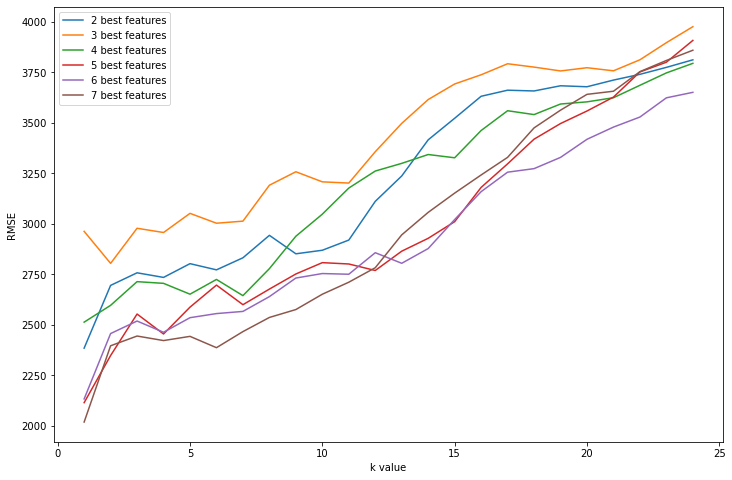

In [161]:
plt.figure(figsize=(12,8))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
  
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

## Rsult
We can see that if we exclude the K value that are less than 3, a K-Value of 6 with all 7 attributes performed the best in our model, with an Root Mean Sqaure Error of 2387.